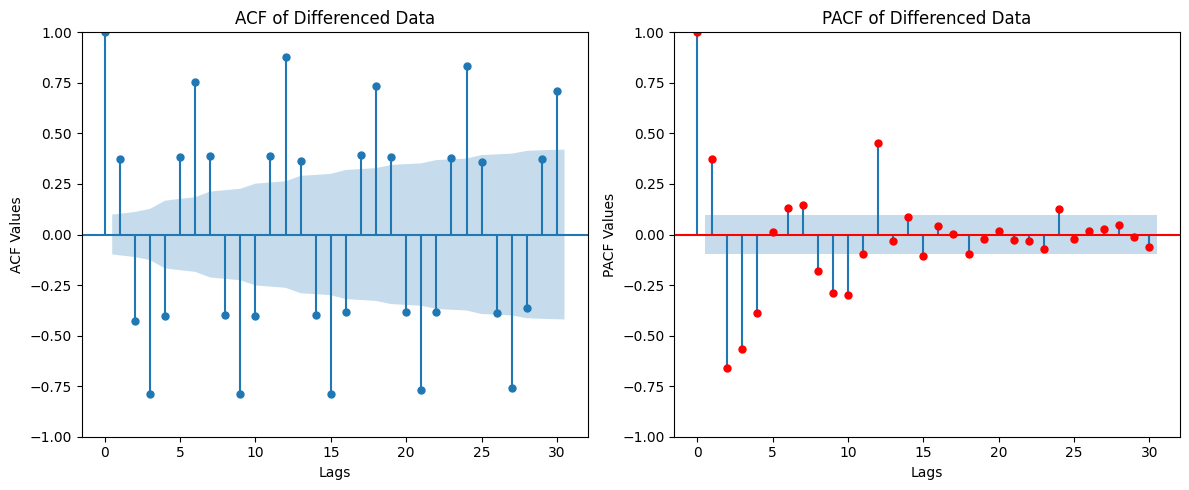

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ---------------------------------
# 1. Load CSV file
# ---------------------------------
df = pd.read_csv("ML471_S1_Datafile_Concept.csv")

# ---------------------------------
# 2. Parse DATE column and set index
# ---------------------------------
df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['DATE'])
df.set_index('DATE', inplace=True)

# ---------------------------------
# 3. Handle missing values in Consumption
# ---------------------------------
df['Consumption'] = df['Consumption'].fillna(df['Consumption'].mean())

# ---------------------------------
# 4. Create differenced series
# ---------------------------------
consumption_diff = df['Consumption'].diff().dropna()

# ---------------------------------
# 5. Plot ACF and PACF
# ---------------------------------
plt.figure(figsize=(12, 5))

# ACF
plt.subplot(1, 2, 1)
plot_acf(consumption_diff, lags=30, ax=plt.gca())
plt.title("ACF of Differenced Data")
plt.xlabel("Lags")
plt.ylabel("ACF Values")
# PACF
plt.subplot(1, 2, 2)
plot_pacf(consumption_diff, lags=30, ax=plt.gca(), method='ywm', color= 'red')
plt.title("PACF of Differenced Data")
plt.xlabel("Lags")
plt.ylabel("PACF Values")

plt.tight_layout()
plt.show()
